## Load Libraries

In [2]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np
import re

## Load data

In [3]:
df = pd.read_csv('Tweets.csv')

In [4]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [5]:
df.dtypes

tweet_id                          int64
airline_sentiment                object
airline_sentiment_confidence    float64
negativereason                   object
negativereason_confidence       float64
airline                          object
airline_sentiment_gold           object
name                             object
negativereason_gold              object
retweet_count                     int64
text                             object
tweet_coord                      object
tweet_created                    object
tweet_location                   object
user_timezone                    object
dtype: object

In [7]:
# Example of tweets
df['text'].head()

0                  @VirginAmerica What @dhepburn said.
1    @VirginAmerica plus you've added commercials t...
2    @VirginAmerica I didn't today... Must mean I n...
3    @VirginAmerica it's really aggressive to blast...
4    @VirginAmerica and it's a really big bad thing...
Name: text, dtype: object

In [11]:
# Clean tweets beforehand to improve word cloud, remove user handles, stop words, word less than 3 characters, etc
# Code from:
# https://www.analyticsvidhya.com/blog/2018/07/hands-on-sentiment-analysis-dataset-python/
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt  

In [12]:
# remove twitter handles (@user)
df['tidy_tweet'] = np.vectorize(remove_pattern)(df['text'], "@[\w]*")
# remove special characters, numbers, punctuations
df['tidy_tweet'] = df['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")
# remove words less than 3 characters long
df['tidy_tweet'] = df['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [13]:
# Stopwords are English words that do not add much meaning to the sentence
comment_words = ' '
stopwords = set(STOPWORDS)

In [14]:
# Create 3 separate dataframes only containing either positive, negative, or neutral tweets
# Positive
pos_df = df[df['airline_sentiment']=='positive']

# Negative
neg_df = df[df['airline_sentiment']=='negative']

# Neutral
neu_df = df[df['airline_sentiment']=='neutral']

In [28]:
# Example of positive tweets with high confidence
pos_high_conf = pos_df[pos_df['airline_sentiment_confidence']==1.0]
print(pos_high_conf['text'][9])
print(pos_high_conf['text'][11])
print(pos_high_conf['text'][12])

@VirginAmerica it was amazing, and arrived an hour early. You're too good to me.
@VirginAmerica I &lt;3 pretty graphics. so much better than minimal iconography. :D
@VirginAmerica This is such a great deal! Already thinking about my 2nd trip to @Australia &amp; I haven't even gone on my 1st trip yet! ;p


In [31]:
# Example of neutral tweet with high confidence
neu_high_conf = neu_df[neu_df['airline_sentiment_confidence']==1.0]
print(neu_high_conf['text'][0])
print(neu_high_conf['text'][23])
print(neu_high_conf['text'][31])

@VirginAmerica What @dhepburn said.
@VirginAmerica will you be making BOS&gt;LAS non stop permanently anytime soon?
@VirginAmerica Are the hours of operation for the Club at SFO that are posted online current?


In [33]:
# Example of negative tweet with high confidence
neg_high_conf = neg_df[neg_df['airline_sentiment_confidence']==1.0]
print(neg_high_conf['text'][3])
print(neg_high_conf['text'][4])
print(neg_high_conf['text'][5])

@VirginAmerica it's really aggressive to blast obnoxious "entertainment" in your guests' faces &amp; they have little recourse
@VirginAmerica and it's a really big bad thing about it
@VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.
it's really the only bad thing about flying VA


## Create word clouds

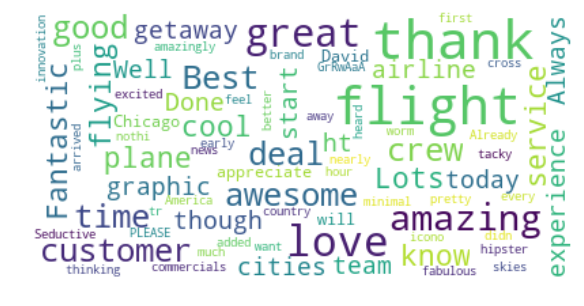

In [15]:
# Positive wordcloud
wordcloud = WordCloud(
                    background_color='white',
                    stopwords=stopwords,
                    max_words=75,
                    max_font_size=40,
                    random_state=42).generate(str(pos_df['tidy_tweet']))
 
print(wordcloud)
fig = plt.figure(1, figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

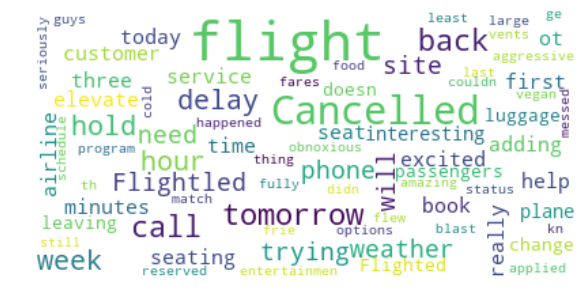

In [16]:
# Negative wordcloud
wordcloud = WordCloud(
                    background_color='white',
                    stopwords=stopwords,
                    max_words=75,
                    max_font_size=40,
                    random_state=42).generate(str(neg_df['tidy_tweet']))
 
print(wordcloud)
fig = plt.figure(1, figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

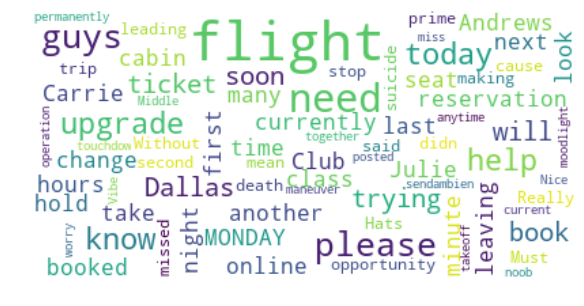

In [17]:
# Neutral 
wordcloud = WordCloud(
                    background_color='white',
                    stopwords=stopwords,
                    max_words=75,
                    max_font_size=40,
                    random_state=42).generate(str(neu_df['tidy_tweet']))
 
print(wordcloud)
fig = plt.figure(1, figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## References

https://www.analyticsvidhya.com/blog/2018/07/hands-on-sentiment-analysis-dataset-python/